In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from plots import hist_plot, plot_bar_pct, pie_plot

# AIM
To predict whether the client will subscribe to a term deposit

# DATA
Data is related to direct marketing campaigns (phone calls) of a portuguese banking institution. Data is from May 2008 to November 2010.\
The features of the dataset are:
* age
* job       - type of job
* marital
* education
* Default   - if customer has credit (just like cibil score but more specific to debt repayment)
* balance   - average yearly balance of the client (in euros)
* housing   - whether the client has a housing loan
* loan      - whether the client has a personal loan
* contact   - mode of contact
* day       - last contact day of the month
* month     - last contact month of the year
* duration  - duration of last contact (in s)
* campaign  - number of times call is made
* pdays     - days past after last call (-1 for not previously contacted)
* poutcome  - outcome of the previous marketing campaign

The output target variable is:
* y         - client subscribed or not

In [2]:
df = pd.read_csv("./DsResearch/Banking/banking_data.csv")

In [3]:
df.head(5)

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


## 1. What is the distribution of age among the clients?

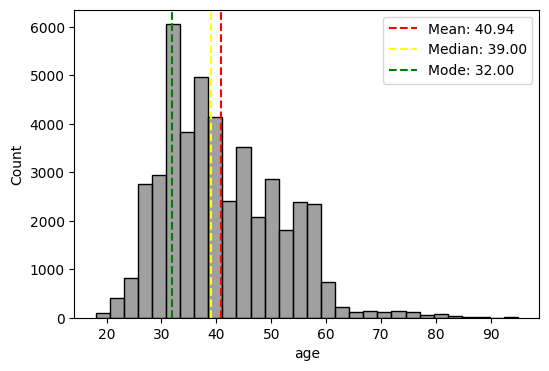

In [4]:
hist_plot(df["age"], (6,4))

From the plot it is clear that the age follows right skewed normal distubtion.

## 2. How does the job type vary among the clients?

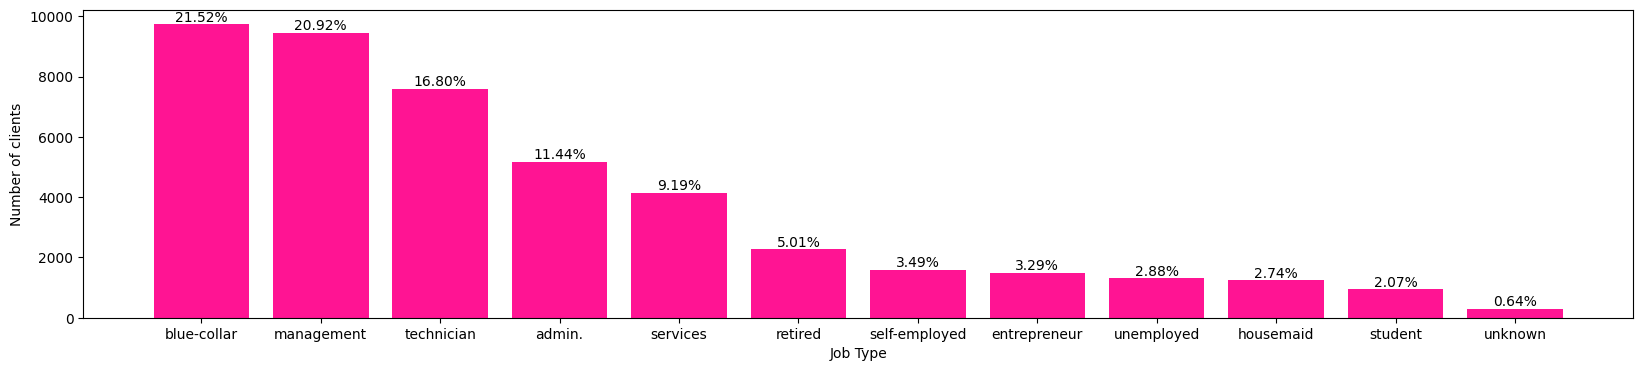

In [15]:
plot_bar_pct(df["job"], "Job Type", "Number of clients" , "", ['deeppink'], (20,4))

Therefore, from the table we can tell that more emphasis has been given to more previleged people, which is correct from the business stand point.

## 3. What is the marital status distribution of the clients?

In [7]:
df['marital'] = df['marital'].fillna('unknown') # to fill out empty spaces

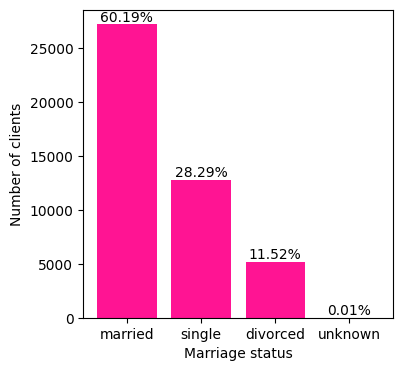

In [8]:
plot_bar_pct(df["marital"], "Marriage status", "Number of clients" , "", ['deeppink'], (4,4))

In [9]:
# n_married = df[df["marital"] == "married"]["marital"].shape[0] # number of married 

n_married = df["marital"].value_counts()["married"] # total number of married clients 

t_clients = df.shape[0]                             # total number of clients

pMarried  = np.round(n_married / t_clients * 100, 2)             # percentage of clients who are married
pMarried

60.19

From the plot we can see that that most of the targetted calls were married and it was found to be about 60.19% of the total clients. This targetting is understandable as married people tend to have more tendency towards saving than that of others, and so is more likely to get a term deposit.

## 4. What is the level of education among the clients?

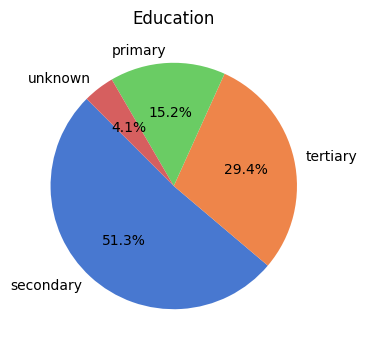

In [10]:
pie_plot(df["education"], "Education")

From data it can be seen that education level of most of the people is second grade.

## what proportion of clients have credit in default?

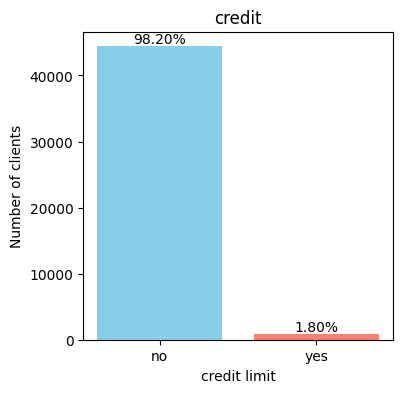

In [11]:
plot_bar_pct(df["default"], "credit limit", "Number of clients" , "credit", ['skyblue', 'salmon'], (4,4))

From data it can be seen that only about two percent of the clients have failed to meet the credit obligation and therefore about 98% of the clients are eligible for further consideration.

## What is the distribution of average yearly balance among the clients?

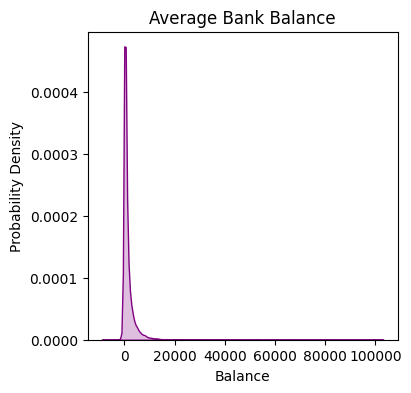

In [12]:
plt.figure(figsize=(4,4))
sns.kdeplot(df['balance'], color = "purple", fill = True)
plt.title('Average Bank Balance')
plt.xlabel('Balance')
plt.ylabel('Probability Density')
plt.show()

From the plot it can be seen that the distrubtion is heavily left skewed that is the tail portion of the distrubtion is towards the postive side. This shows that most of the clients of interest are from middle income groups. This type of targetting is good as middle income groups are the ones commonly tend to do more savings as opposed to high income groups who are more focused on investing.

## How many clients have housing loans?

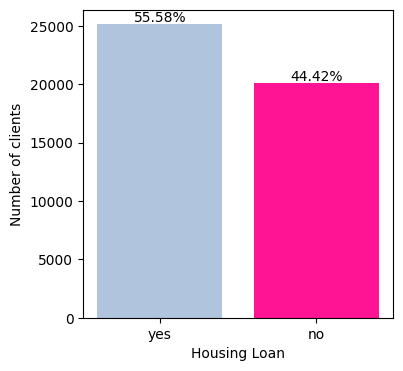

In [13]:
plot_bar_pct(df["housing"], "Housing Loan", "Number of clients" , "", ['lightsteelblue', 'deeppink'], (4,4))

It can be seen that 55.58% of the clients have taken up housing loan. So, there is a less possibility for them to make term deposits at this point in time. Therefore, we need to give less importance to them and focus on those that don't have any housing loans.

## How many clients have personal loans?

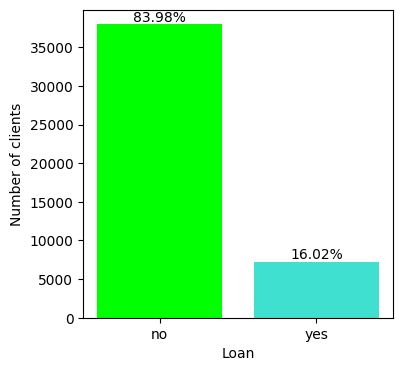

In [14]:
plot_bar_pct(df["loan"], "Loan", "Number of clients" , "", ['lime', 'turquoise'], (4,4))

83.98% of the clients don'haven't taken up any loan right now, therefore more focus needs to be give for that category of clients are they are more likely to make term deposits as they dont have any other commitments.

## What are the communication types used for contacting clients during the campaign?

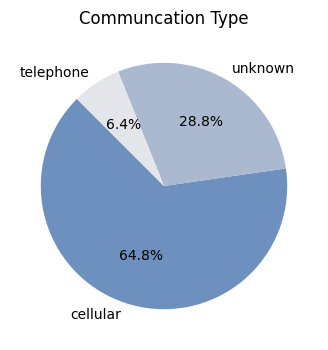

In [17]:
pie_plot(df["contact"], "Communcation Type", color = "vlag")

From the above plot, it can be seen about two-thirds of the client are contact by cellular means with about 28.8% unknown which by the very well could add to the cellular percentage.

## What is the distribution of the last contact day of the month?

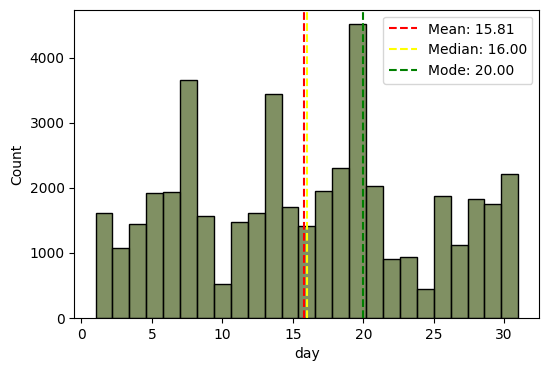

In [18]:
hist_plot(df["day"], (6,4), bins = 25, color="darkolivegreen")

From the plot it can be seen that the distribution is more or less uniform. So nothing much could be concluded from this. But in my view, the company could have created a better plan of reminding the clients after particular number of days instead of calling them randomly after some days.

## How does the last contact month vary among the clients?

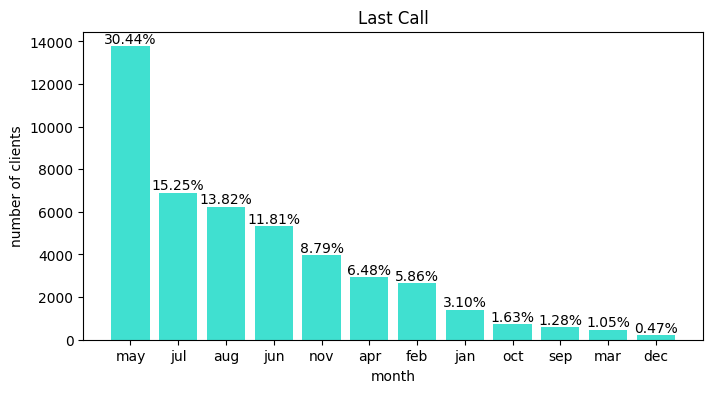

In [19]:
plot_bar_pct(df['month'], "month", "number of clients", "Last Call")

## What is the distribution of the duration of the last contact?

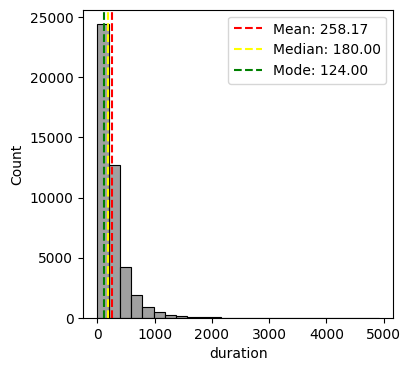

In [20]:
hist_plot(df["duration"], (4,4), bins = 25, color="gray")

## How many contacts were performed during the campaign for each client?

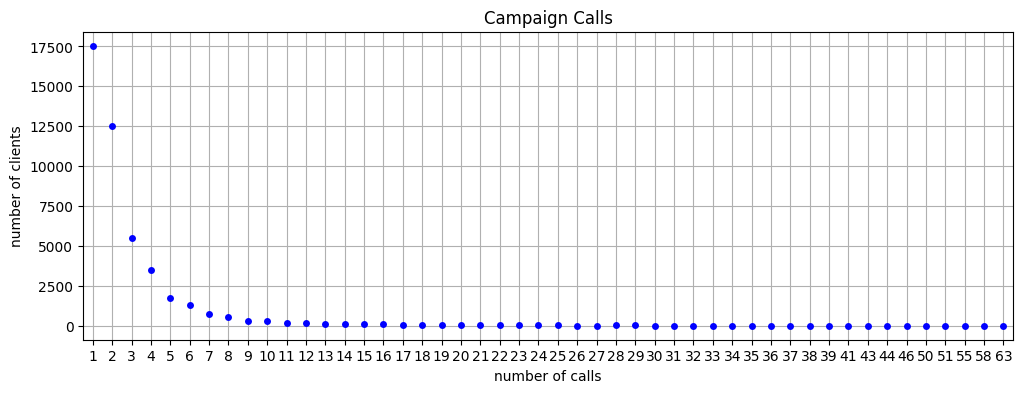

In [21]:
cam = pd.DataFrame({'count':df["campaign"].value_counts()})

plt.figure(figsize=(12,4))
sns.stripplot(x=cam.index, y='count', data=cam, jitter=True, color='blue')
plt.xlabel("number of calls")
plt.ylabel("number of clients")
plt.title("Campaign Calls")
plt.grid(2)
plt.show()

From data it can be seen that most of the calls were made only once during the campaign.

## What is the distribution of the number of days passed since the client was last contacted from a previous campaign?

In [22]:
n_days = df[df["pdays"] != -1]["pdays"].reset_index()

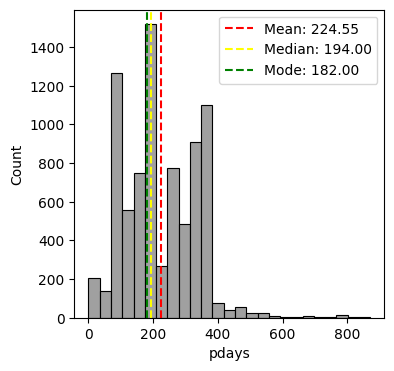

In [23]:
hist_plot(n_days["pdays"], (4,4), bins = 25, color="gray")

From the plot it can be seen that high percentage of calls are made after half an year.

## How many contacts were performed before the current campaign for each client?

In [24]:
campaign_counts = df['campaign'].value_counts()
campaign_counts = pd.DataFrame({'counts': campaign_counts.values}, index=campaign_counts.index)

campaign_counts

,counts
campaign,
1,17548
2,12506
3,5521
4,3522
5,1764
6,1291
7,735
8,540
9,327


## What were the outcomes of the previous marketing campaigns?

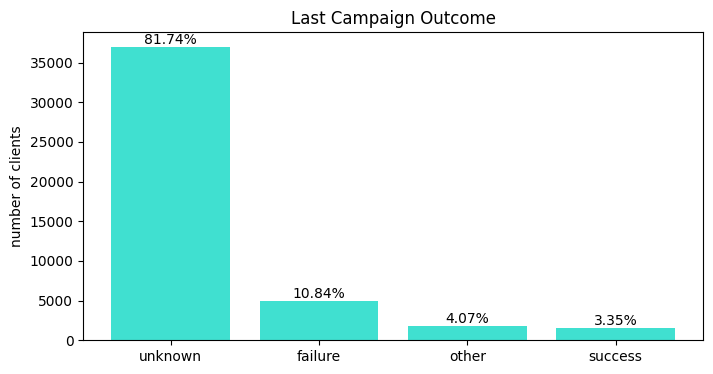

In [25]:
plot_bar_pct(df["poutcome"], "", "number of clients", "Last Campaign Outcome")

## What is the distribution of clients who subscribed to a term deposit vs. those who did not?

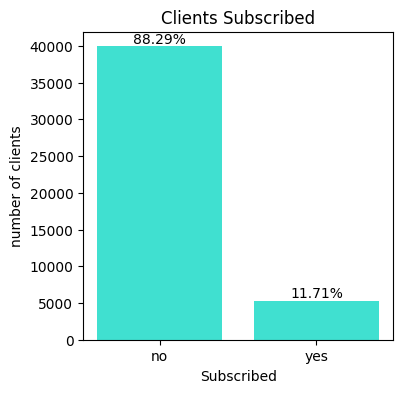

In [26]:
plot_bar_pct(df["y"], "Subscribed", "number of clients", "Clients Subscribed", size = (4,4))

## Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?

In [27]:
def corr(df, feature, dep, label = None, cat = False):

    dfc = df[:]

    dfc = dfc[dfc[feature] != "unknown"]             # remove unknowns
    dfc = dfc[dfc[dep] != "unknown"]
    
    y_encoder = LabelEncoder()

    dfc['y_enc'] = y_encoder.fit_transform(dfc[dep]) # dependent variable encoder
    
    if cat == True:
    
        dfc.loc[df[feature] == label, feature] = 1   # encoding
        dfc.loc[(dfc[feature] != label) & (dfc[feature] != 1), feature] = 0
    
        dfc = dfc[[feature, 'y_enc']].corr()         # computing correlation

    else:

        x_encoder = LabelEncoder()

        dfc['x_enc'] = x_encoder.fit_transform(dfc[feature]) # encoding independent variable

        dfc = dfc[['x_enc', 'y_enc']].corr()         # computing variance covariance

    correlation = dfc["y_enc"][0]                    # requried correlation

    return correlation

#### married vs Subscription 

In [28]:
mCor = corr(df, "marital", "y", "married", cat=True)
mCor

-0.06024909388632493

#### unmarried vs Subscription 

In [29]:
umCor = corr(df, "marital", "y", "single", cat = True)
umCor

0.0634458183295189

There seems to be no correlation between marriage and likelihood of taking term deposits

#### primary education vs Subscription 

In [30]:
peCor = corr(df, "education", "y", "primary", cat = True)
peCor

-0.040370276373443544

#### secondary education vs Subscription 

In [31]:
seCor = corr(df, "education", "y", "secondary", cat = True)
seCor

-0.03552483897950037

#### tertiary education vs Subscription 

In [32]:
teCor = corr(df, "education", "y", "tertiary", cat = True)
teCor

0.07025151470740879

there seems to be no correlation between education type and likelihood of taking term deposits

#### Credit vs Subscription (without default)

In [33]:
crCor = corr(df, "default", "y", "no", cat = True)
crCor

0.02245073825513956

there seems to be no correlation between client credit and likelihood of taking term deposits

#### balance vs Subscription

In [34]:
balCor = corr(df, "default", "y")
balCor

-0.022450738255136837

there seems to be no correlation between balance remaining in the account of client and likelihood of taking term deposits

#### Housing loan vs Subscription (without loan)

In [35]:
hoCor = corr(df, "housing", "y", "no", cat = True)
hoCor

0.13944472768604876

there seems to be some negative correlation between housing loan status of client and likelihood of taking term deposits. That is as the client is having a housing loan, it is less likely that he makes a term deposit.

#### loan vs Subscription (without loan)

In [36]:
lCor = corr(df, "loan", "y", "no", cat = True)
lCor

0.06828852445695313

there seems to be no correlation between loan status of client and likelihood of taking term deposits

#### days since last contact vs Subscription

In [37]:
dayCor = corr(df, "day", "y")
dayCor

-0.02830697649201581

there seems to be no correlation between days since last contact and likelihood of taking term deposits

#### duration of call vs Subscription

In [38]:
durCor = corr(df, "duration", "y")
durCor

0.40774019275222156

there seems to be good correlation between duration of the calls and likelihood of taking term deposits. Therefore, as the duration of call increases, it is more likely to convice the client to make a term deposit.

#### number of calls vs Subscription

In [39]:
ncalCor = corr(df, "campaign", "y")
ncalCor

-0.07364785504042942

there seems to be no correlation between number of calls made and likelihood of taking term deposits

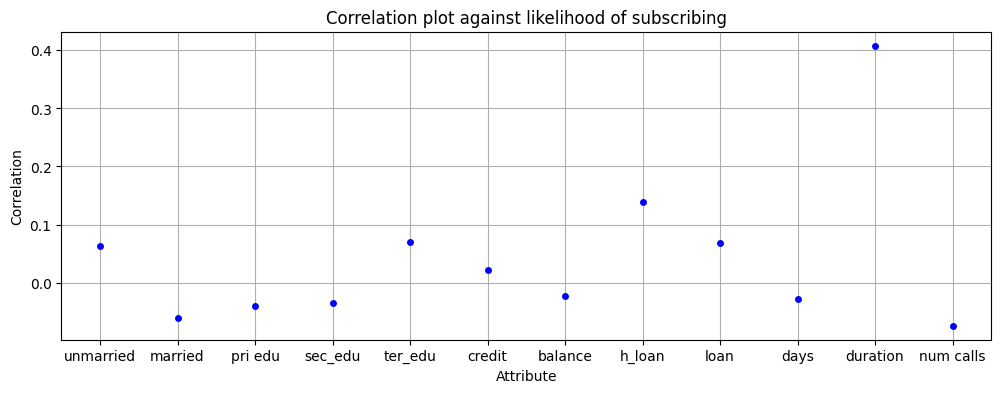

In [40]:
cor_plot = pd.DataFrame({'count':[umCor, mCor, peCor, seCor, teCor, crCor, balCor, hoCor, lCor, dayCor, durCor, ncalCor]})

cor_labels = ["unmarried", "married", "pri edu", "sec_edu", "ter_edu", \
              "credit", "balance", "h_loan", "loan", "days", "duration", "num calls"]

plt.figure(figsize=(12,4))
sns.stripplot(x=cor_labels, y='count', data=cor_plot, jitter=True, color='blue')
plt.xlabel("Attribute")
plt.ylabel("Correlation")
plt.title("Correlation plot against likelihood of subscribing")
plt.grid(2)
plt.show()